In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_digits

In [5]:
df=load_digits()

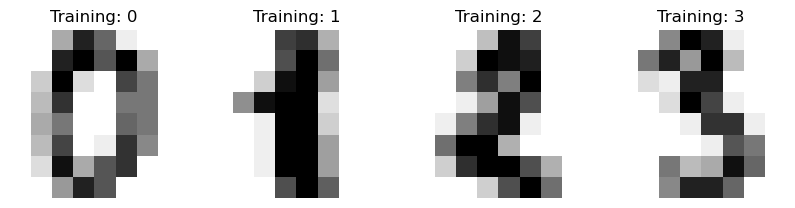

In [9]:
_,axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %d" % label)



In [10]:
df.images.shape

(1797, 8, 8)

In [11]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
df.images[0].shape

(8, 8)

In [13]:
len(df.images)

1797

In [14]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [15]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
data[0].shape

(64,)

In [17]:
data.shape

(1797, 64)

In [18]:
#scaling image Data
data.min()

0.0

In [19]:
data.max()

16.0

In [20]:
data=data/16

In [21]:
data.min()

0.0

In [22]:
data.max()

1.0

In [23]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [24]:
#train test Split Data
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(data,df.target,test_size=0.3)

In [26]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [28]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf=RandomForestClassifier()

In [32]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [33]:
#Predict Test Data
Y_pred=rf.predict(X_test)

In [34]:
Y_pred

array([0, 9, 9, 5, 6, 1, 0, 4, 6, 8, 2, 5, 6, 9, 2, 8, 7, 3, 2, 1, 8, 5,
       1, 6, 6, 6, 2, 1, 2, 7, 7, 1, 1, 7, 7, 6, 5, 4, 0, 6, 5, 1, 6, 1,
       9, 2, 0, 7, 3, 3, 1, 4, 9, 9, 5, 0, 9, 0, 6, 0, 7, 0, 4, 3, 7, 5,
       9, 3, 2, 3, 6, 0, 2, 9, 9, 7, 2, 0, 8, 5, 9, 4, 8, 7, 8, 5, 5, 6,
       3, 9, 0, 3, 7, 5, 8, 1, 8, 0, 5, 3, 2, 9, 3, 0, 6, 0, 4, 0, 6, 2,
       3, 7, 0, 2, 5, 0, 6, 6, 5, 1, 7, 9, 1, 6, 7, 9, 9, 3, 9, 0, 5, 5,
       5, 3, 0, 9, 4, 6, 4, 0, 8, 8, 9, 8, 6, 2, 5, 7, 1, 8, 9, 3, 8, 6,
       0, 0, 4, 2, 5, 3, 7, 1, 0, 7, 0, 5, 9, 6, 2, 1, 8, 1, 4, 9, 5, 1,
       2, 2, 4, 3, 2, 5, 8, 7, 6, 7, 6, 8, 1, 5, 5, 2, 4, 0, 8, 2, 4, 8,
       9, 1, 0, 1, 9, 6, 2, 1, 2, 6, 7, 4, 8, 6, 4, 4, 5, 4, 8, 5, 8, 3,
       9, 5, 4, 4, 4, 6, 4, 4, 3, 5, 1, 2, 2, 8, 1, 5, 1, 3, 1, 0, 4, 5,
       8, 7, 0, 1, 1, 6, 1, 5, 7, 6, 4, 1, 8, 2, 9, 3, 7, 4, 1, 8, 1, 5,
       4, 3, 9, 7, 4, 4, 5, 7, 9, 7, 5, 5, 8, 9, 5, 0, 1, 8, 3, 9, 2, 7,
       6, 2, 8, 7, 9, 7, 8, 0, 7, 5, 1, 4, 6, 1, 8,

In [35]:
#Model Accuracy

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

In [37]:
confusion_matrix(Y_test,Y_pred)

array([[56,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 59,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  3,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 47,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 57,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  1,  0, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 56,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  1, 47,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  2, 50]], dtype=int64)

In [38]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        57
           1       0.97      1.00      0.98        59
           2       1.00      1.00      1.00        42
           3       1.00      0.93      0.96        54
           4       0.92      0.96      0.94        49
           5       0.93      0.97      0.95        59
           6       1.00      0.97      0.98        59
           7       0.93      0.98      0.96        57
           8       0.96      0.94      0.95        50
           9       0.94      0.93      0.93        54

    accuracy                           0.96       540
   macro avg       0.97      0.96      0.97       540
weighted avg       0.97      0.96      0.96       540

